What is Home Credit?

Home Credit is a global financial services company specializing in consumer lending. It provides loans to individuals, particularly in emerging markets, who have limited or no access to traditional banking services. Its primary offerings include personal loans, microloans, and credit cards.

Target Audience:

Home Credit caters to underserved populations, such as individuals with low credit scores, limited credit history, or those living in emerging economies.

Business Model:

The company assesses customers' creditworthiness to decide loan approvals and set interest rates based on the likelihood of default.


---

Goals of the Home Credit Default Risk Competition

Participants aim to predict whether a loan applicant will default using data that includes:

Demographics: Age, gender, family status.

Credit History: Previous loans, current debts.

Financial Standing: Income, employment, dependents.

Behavioral Indicators: Recent changes in financial circumstances.


The target variable is binary (default = 1, non-default = 0), and participants build machine learning models to predict default risk based on these factors.


---

Benefits of Default Prediction for Home Credit

1. Reduced Financial Losses: Avoids lending to high-risk applicants, minimizing defaults and associated losses.


2. Improved Risk Assessment: Enhances credit scoring models using data-driven techniques, ensuring better creditworthiness evaluation.


3. Optimized Lending Strategy: Tailors loan terms (e.g., interest rates) to risk profiles, offering favorable terms to low-risk customers.


4. Efficient Customer Acquisition: Focuses marketing on low-risk customers, improving profitability and reducing defaults.


5. Regulatory Compliance: Meets legal requirements for assessing borrowers' repayment ability, maintaining trust.


6. Enhanced Customer Experience: Offers personalized loan terms, improving satisfaction and fostering loyalty.



By accurately predicting loan defaults, Home Credit enhances financial stability, compliance, and customer trust while driving growth.

10 Key Features and Their Role in Home Valuation

1. OverallQual: Measures the overall quality of the house, serving as the strongest indicator of price.


2. GrLivArea: Represents the above-ground living area in square feet; larger areas are typically linked to higher prices.


3. GarageCars: Indicates the number of vehicles the garage can accommodate, reflecting the house’s size and functionality.


4. TotRmsAbvGrd: Refers to the total number of above-ground rooms, with more rooms generally leading to a higher valuation.


5. 1stFlrSF: The floor area of the first level; larger first floors are commonly found in more expensive homes.


6. ExterCond: Represents the condition of the exterior, with better conditions associated with higher property values.


7. FullBath: The number of full bathrooms; houses with two or more full baths are often more valuable.


8. Fireplaces: The number of fireplaces in the house, often considered a sign of luxury and tied to higher prices.


9. BsmtFinSF1: The finished area of the basement, which adds significant value to the home.


10. LotArea: The total lot size in square feet; larger lots are typically associated with higher-priced properties.



These features collectively influence a home's market value and are essential for property valuation.


---



First 10 rows of the dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   12

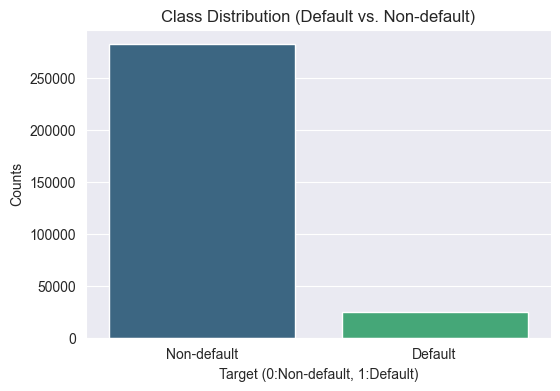


Class Distribution(%):
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# loading the dataset
data = pd.read_csv('application_train.csv')

# viewing the snippet of the data
print("First 10 rows of the dataset:")
print(data.head(10))

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# checking missing values
missing_values =data.isnull().sum()
missing_percentage =(missing_values/len(data))*100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print("\nMissing Values:")
print(missing_df)

# Graph showing class ratios
plt.figure(figsize=(6,4))
sns.countplot(x = 'TARGET', data=data, palette='viridis', hue='TARGET', legend=False)
plt.title("Class Distribution (Default vs. Non-default)")
plt.xlabel('Target (0:Non-default, 1:Default)')
plt.ylabel('Counts')
plt.xticks(ticks=[0, 1], labels=['Non-default', 'Default'])
plt.show()

# printing class distribution percentages

class_ratios = data['TARGET'].value_counts(normalize=True) * 100

print("\nClass Distribution(%):")
print(class_ratios)

Data Quality and Missing Values Issue: There are missing values in various columns.

Questions: Which columns have the most missing values?

How should we handle them—by imputation, removal, or leaving them as-is?

Do the missing values affect the predictive power of the model?

Should we drop rows or columns with missing data, or would imputing values make more sense?

What imputation methods are most appropriate for different types of variables (e.g., mean imputation for numerical, mode for categorical)?

Imbalanced Dataset Issue: The target variable, TARGET (indicating whether a client defaulted or not), may be imbalanced.

Questions: What is the distribution of the target variable?

Are there more non-defaulters (0) than defaulters (1)?
If there is class imbalance, what strategies can we apply to handle it (e.g., oversampling, under sampling, or class weights in the model)?

Should we apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset?

Feature Engineering Issue: Raw features in the dataset may not be directly useful for prediction. Questions: Are there any categorical features that need to be encoded (e.g., one-hot encoding, label encoding)?

Are there numerical features that can be transformed to improve model performance (e.g., logarithmic transformation for skewed data)?

Can we create new features that might enhance prediction accuracy (e.g., combining columns like income and age to create new variables)?

Correlation between Features and Target Variable Issue: We need to understand how different features relate to the target variable (default or non-default).

Questions: Which features are most correlated with the target variable?

Are there any strong predictors of default? How do numerical features like income, age, or credit score relate to the likelihood of defaulting on a loan?

Do certain categorical features like family status, housing situation, or occupation provide significant insights into default behavior?

Outliers and Data Distribution Issue: Outliers and skewed distributions could affect model accuracy.

Questions: Are there outliers in any numerical columns (e.g., income or loan amount)?

How do we handle these outliers—should we remove them, transform them, or keep them as is?
Do any numerical features exhibit skewness, and would transformation (like log or square root) help in creating a more normal distribution?

Temporal or Seasonal Patterns Issue: Loan default behavior could vary across different periods or seasons.
Questions: Are there any temporal patterns in the data (e.g., defaults vary by season, year, or month)?
Can we incorporate time-related features such as the length of time a client has been with the company to predict defaults?

How might recent economic conditions (e.g., COVID-19) impact loan defaults, and how can we simulate such factors in the data?

Model Performance Issue: We need to build and evaluate a model that predicts the likelihood of a client defaulting on a loan.
Questions: Which machine learning models are most suitable for this task (e.g., logistic regression, decision trees, random forests, or gradient boosting)?

What metrics should we use to evaluate the model’s performance (e.g., accuracy, F1-score, ROC AUC)?

How should we tune the model’s hyperparameters for optimal performance?

Impact of External Factors Issue: External factors like economic conditions might affect the likelihood of default.

Questions: How can we incorporate external economic indicators (e.g., unemployment rates, inflation) into the analysis to improve predictions?

Are there any other features that should be included based on domain knowledge (e.g., location, historical loan data, etc.)?


In [2]:
numerical_summary = data.describe()
print(numerical_summary)


          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [4]:
# count of the missing values for every column
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data/len(data))*100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)

                              Missing Values  Percentage
AMT_ANNUITY                               12    0.003902
AMT_CREDIT                                 0    0.000000
AMT_GOODS_PRICE                          278    0.090403
AMT_INCOME_TOTAL                           0    0.000000
AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
...                                      ...         ...
YEARS_BEGINEXPLUATATION_MEDI          150007   48.781019
YEARS_BEGINEXPLUATATION_MODE          150007   48.781019
YEARS_BUILD_AVG                       204488   66.497784
YEARS_BUILD_MEDI                      204488   66.497784
YEARS_BUILD_MODE                      204488   66.497784

[122 rows x 2 columns]


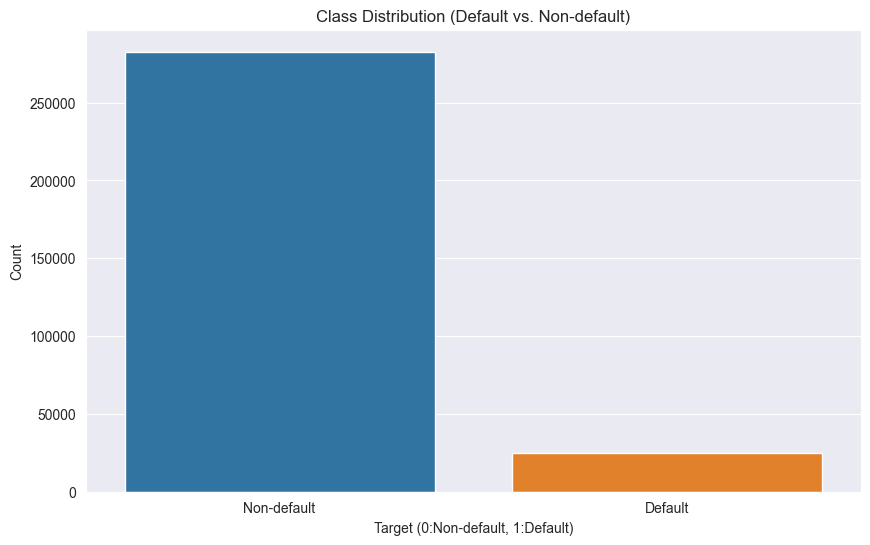

In [5]:
# plotting the target variable
plt.figure(figsize=(10,6))
sns.countplot(x = 'TARGET', data=data, hue='TARGET', legend=False)
plt.title("Class Distribution (Default vs. Non-default)")
plt.xlabel('Target (0:Non-default, 1:Default)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-default', 'Default'])
plt.show()


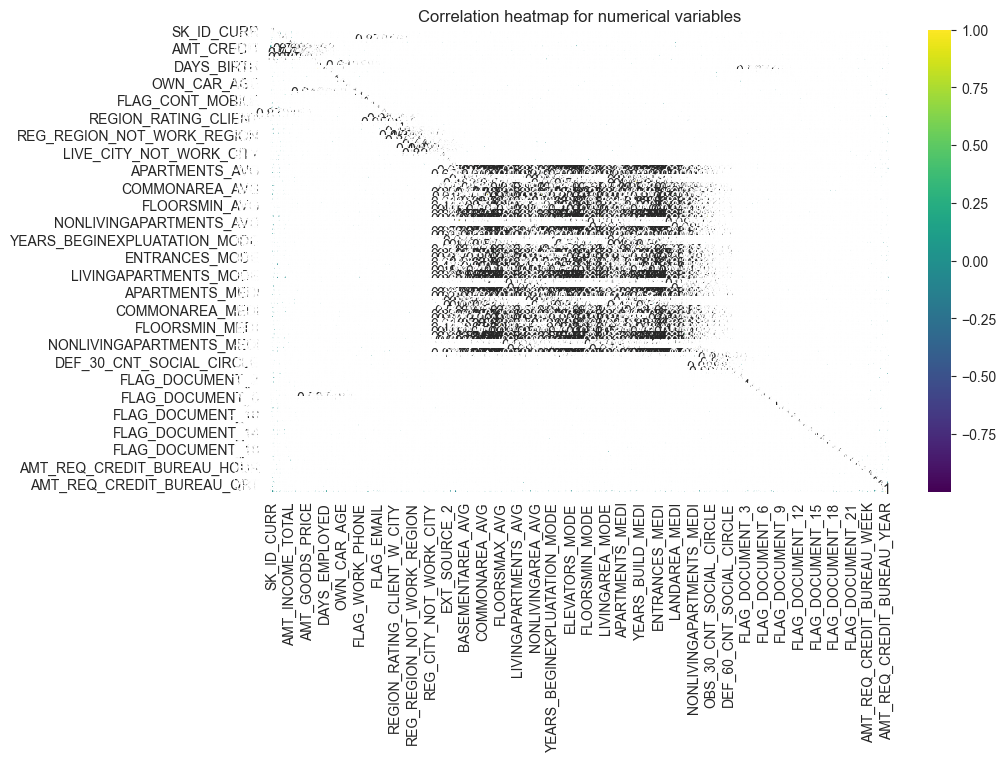

In [7]:
import numpy as np
# Selecting numeric columns only
numeric_data = data.select_dtypes(include=[np.number])
# calculating the correlation matrix
correlation_matrix = numeric_data.corr()
# plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='g', linewidths=.5)
plt.title('Correlation heatmap for numerical variables')
plt.show()